## OC-CCI timeseries analysis for 8-day chlor

In [1]:
%matplotlib inline
# Plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter, YearLocator

# Data 
import netCDF4 as nc
import numpy as np
import pandas as pd

# Stats
import pymannkendall as mk
from scipy.stats import linregress

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\mkmrt\\OneDrive\\Documents\\year_3'

In [3]:
# NOTE: Please remember to replace my path with your path (pwd) to where your Chla data are
OC = pd.read_csv("C:\\Users\\mkmrt\\OneDrive\\Documents\\year__3\\chlor_a.csv")
OC.head(3)

,date,min,max,mean,std,median
0,2019-01-01T00:00:00,4.187652,6.138091,4.972163,0.044880,4.891020
1,2019-01-09T00:00:00,3.181342,5.950683,4.610897,0.078699,4.563383
2,2019-01-17T00:00:00,3.811871,6.142032,4.959898,0.061589,4.897897


In [4]:
# Make a subset dataframe of the date and mean CHL for further processing
df = pd.DataFrame({'Date':OC['date'], 'Chl':OC['mean'], 'Std':OC['std']})

In [5]:
# Make date format more friendly to use
df['Date']= pd.to_datetime(df['Date'], format=('%Y-%m-%dT%H:%M:%S'))
df.head(4)

,Date,Chl,Std
0,2019-01-01,4.972163,0.044880
1,2019-01-09,4.610897,0.078699
2,2019-01-17,4.959898,0.061589
3,2019-01-25,5.439614,0.057859


In [6]:
# How many years in our timeseries:
num=df['Date'].dt.year.nunique()
num

1

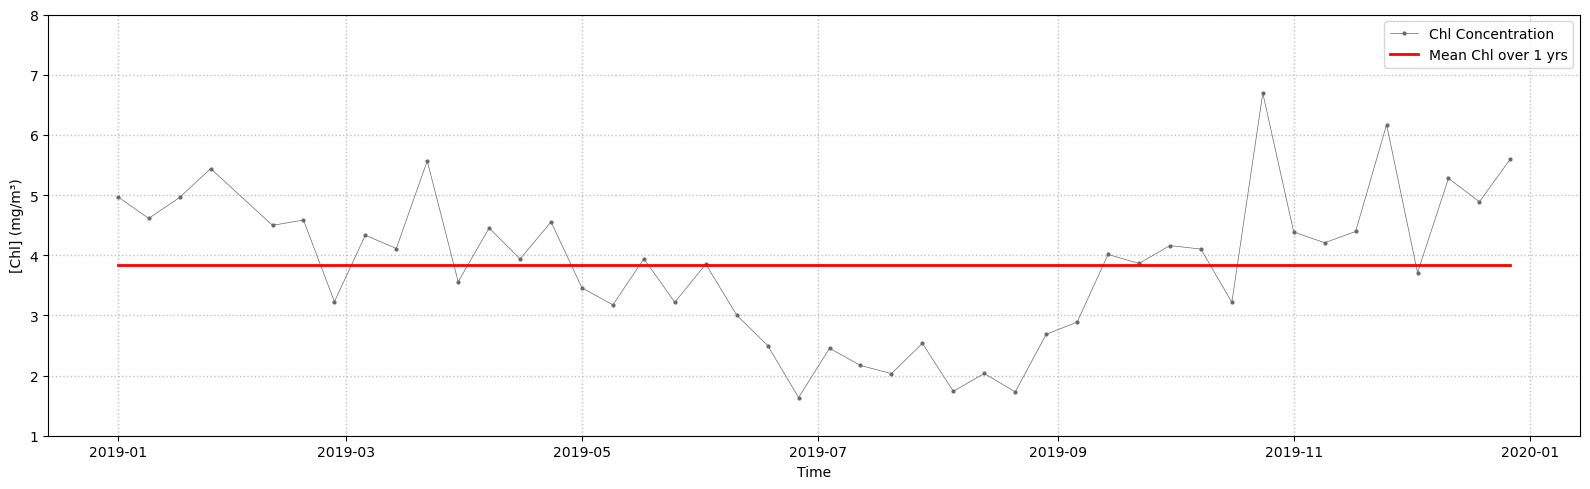

In [7]:
# Lineplot of [Chl] and Associated STD (full timeseries) with means
fig1, ax1 = plt.subplots(figsize=(16, 5))  # 1 row, 2 columns
#-----------------------------------------------------------------------------------------------------------
# Plot on the first axis (Chl)
ax1.plot(df['Date'], df['Chl'], linewidth=0.5, linestyle='-', marker='o', markersize=2, c='dimgrey',
         label='Chl Concentration')

# Mean [Chl] line in red on the first axis
mean_chl = np.nanmean(df['Chl'])
ax1.plot([df['Date'].min(), df['Date'].max()], [mean_chl, mean_chl], color='r', linestyle='-', linewidth=2, 
         label=f'Mean Chl over {num} yrs')
# Set y-axis limits for the first axis (Chl)
ax1.set_ylim([1, 8])

# Add labels and grid to the first axis
ax1.set_xlabel('Time')
ax1.set_ylabel('[Chl] (mg/m³)') #added unit
ax1.grid(True, color='silver', linestyle=':', linewidth=1)
ax1.legend()
#-----------------------------------------------------------------------------------------------------------
# Plot on the second axis (Std Dev)
#ax2.plot(df['Date'], df['Std'], linewidth=0.5, linestyle='-.', marker='o', markersize=2, c='navy',
 #        label='Std Deviation')

# Mean [Std] line in red on the second axis
#mean_std = np.nanmean(df['Std'])
#ax2.plot([df['Date'].min(), df['Date'].max()], [mean_std, mean_std], color='r', linestyle='-', linewidth=2, 
 #        label=f'Mean Std over {num} yrs')
# Set y-axis limits for second axis (Std)
#ax2.set_ylim([0, 1])

# Add labels and grid to the second axis
#ax2.set_xlabel('Time')
#ax2.set_ylabel('Std Dev (mg/m³)')  # Added unit
#ax2.grid(True, color='silver', linestyle=':', linewidth=1)
#ax2.legend()
#-----------------------------------------------------------------------------------------------------------
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()

In [12]:
# Data Prep for Linear regression:
x_date = df['Date']              # Your actual dates
x_num1 = dates.date2num(x_date)  # Convert dates to numerical format
CHL = df["Chl"]                  # Your CHL data
STD = df['Std']                  # Your STD data

# Perform linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x_num1, CHL)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x_num1, STD)

# Calculate the trendlines
trend_CHL = slope1 * x_num1 + intercept1
trend_STD = slope2 * x_num1 + intercept2

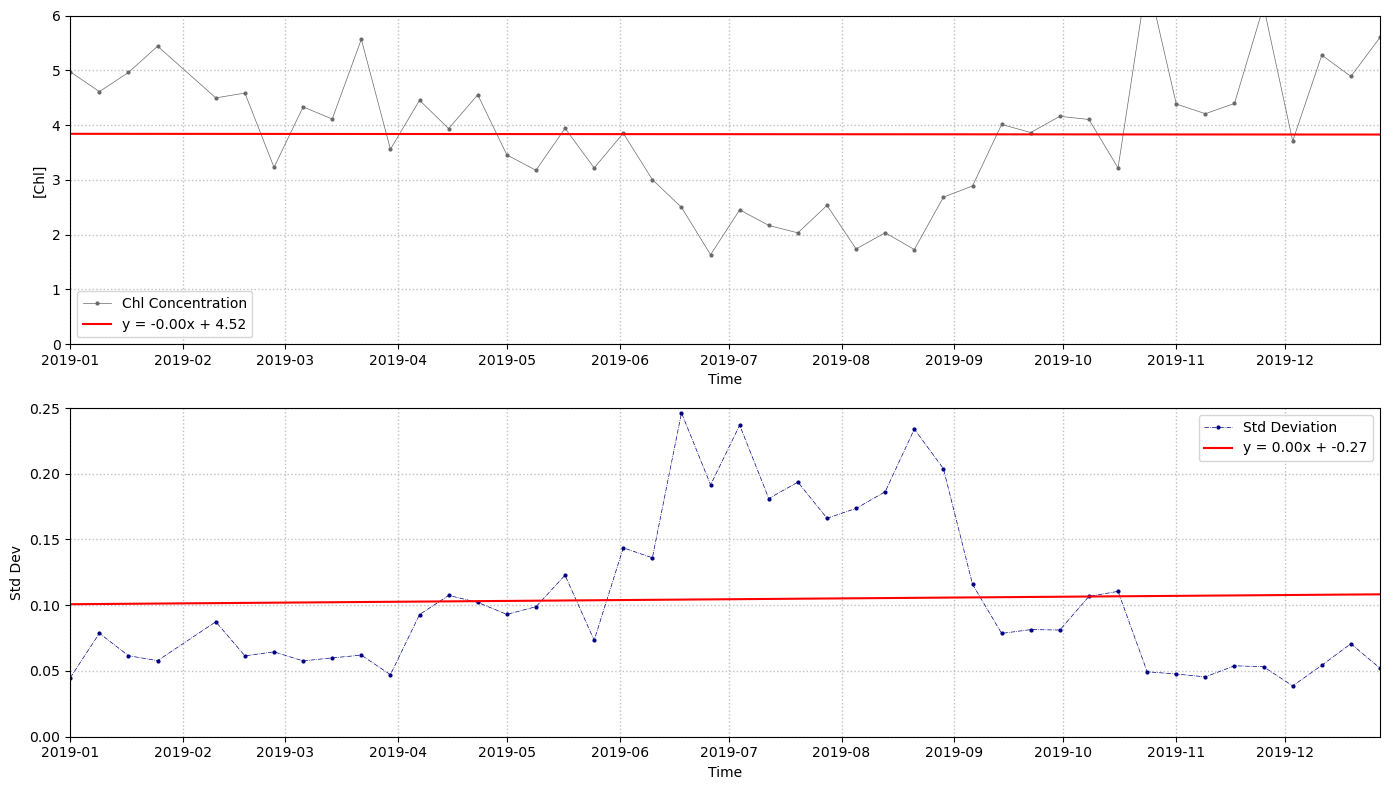

In [13]:
# Lineplot of [Chl] and Associated STD (full timeseries) with means
fig2, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))  # 1 row, 2 columns
#-----------------------------------------------------------------------------------------------------------
# Plot on the first axis (Chl)
ax1.plot(df['Date'], df['Chl'], linewidth=0.5, linestyle='-', marker='o', markersize=2, c='dimgrey',
         label='Chl Concentration')

# Plot trendline from linear regression
ax1.plot(x_date, trend_CHL, color='r', label=f'y = {slope1:.2f}x + {intercept1:.2f}')

# Formatting the plot nicely
ax1.set_xlim([df['Date'].min(), df['Date'].max()])
# Set y-axis limits for the first axis (Chl)
ax1.set_ylim([0, 6])

# Add labels and grid to the first axis
ax1.set_xlabel('Time')
ax1.set_ylabel('[Chl]')
ax1.grid(True, color='silver', linestyle=':', linewidth=1)
ax1.legend()
#-----------------------------------------------------------------------------------------------------------
# Plot on the second axis (Std Dev)
ax2.plot(df['Date'], df['Std'], linewidth=0.5, linestyle='-.', marker='o', markersize=2, c='navy',
         label='Std Deviation')

# Plot trendline from linear regression
ax2.plot(x_date, trend_STD, color='r', label=f'y = {slope2:.2f}x + {intercept2:.2f}')

# Formatting the plot nicely
ax2.set_xlim([df['Date'].min(), df['Date'].max()])
# Set y-axis limits for second axis (Std)
ax2.set_ylim([0, 0.25])

# Add labels and grid to the second axis
ax2.set_xlabel('Time')
ax2.set_ylabel('Std Dev')
ax2.grid(True, color='silver', linestyle=':', linewidth=1)
ax2.legend()
#-----------------------------------------------------------------------------------------------------------
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()

In [14]:
# Are the trends we see significant?
trend1 = mk.original_test(df['Chl'])
trend2 = mk.original_test(df['Std'])
print("Trend in Chlorophyll-a:",trend1[0], ", P-value =", ("%.3f" % trend1[2]))
print("Trend in Std Deviation:",trend2[0], ", P-value =", ("%.3f" % trend2[2]))

Trend in Chlorophyll-a: no trend , P-value = 0.512
Trend in Std Deviation: no trend , P-value = 0.930


In [15]:
# Ensure 'Date' is a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Split the data into two sets: before 2011 and after (including 2011). unsure what to set as my before as my data is only 2018
#df_Chl = df[df['Chl']
#df_Std = df[df['Std'] 
            
# Filter rows where 'Chl' meets a certain condition, for example, greater than 2
df_Chl = df[df['Chl'] > 0]

# Filter rows where 'Std' meets a certain condition, for example, less than 0.3
df_Std = df[df['Std'] < 0.3]


# Reset the index for DF after 2011
#df_Af = df_Af.reset_index(drop=True)

# Display the two datasets
#print("Data before 2011:")
#print(df_Be.head(3))

#print("\nData from 2011 onwards:")
#print(df_Af.head(3))

Text(0.5, 1.0, 'Standard Deviation')

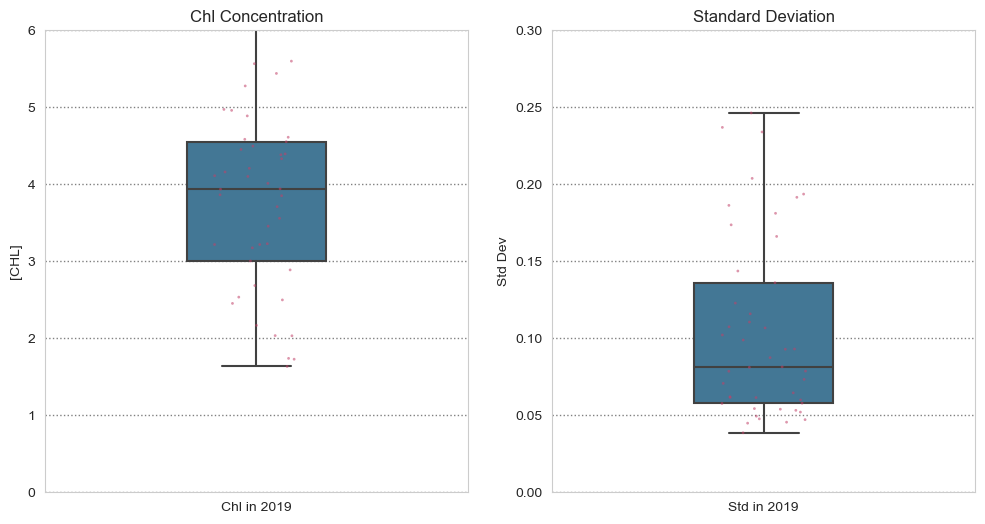

In [16]:
import pandas as pd

##my own code attempt
# Create the boxplots for 'Chl' and 'Std'
box1 = pd.DataFrame({'Chl in 2019': df_Chl['Chl']})
box2 = pd.DataFrame({'Std in 2019': df_Std['Std']})

# Set the overall style
sns.set_style('whitegrid')
# Create a figure with two subplots (1 row, 2 columns)
fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed
#-----------------------------------------------------------------------------------------------------------
# Plot the 'Chl' boxplot in the first subplot
sns.boxplot(data=box1, width=0.33, palette="mako", flierprops=dict(marker=''), ax=ax1)
sns.stripplot(data=box1, palette="flare", s=2, jitter=True, alpha=0.55, ax=ax1)

# Limits, Gridlines, Title
ax1.set_ylim([0, 6])  # Set y-limits for 'Chl'
ax1.set_ylabel('[CHL]', fontsize=10)
ax1.grid(True, linestyle=':', linewidth=1, color='gray', axis='y')
ax1.set_title('Chl Concentration')
#-----------------------------------------------------------------------------------------------------------
# Plot the 'Std' boxplot in the second subplot
sns.boxplot(data=box2, width=0.33, palette="mako", flierprops=dict(marker=''), ax=ax2)
sns.stripplot(data=box2, palette="flare", s=2, jitter=True, alpha=0.55, ax=ax2)

# Limits, Gridlines, Title
ax2.set_ylim([0, 0.3])  # Adjust y-limits for 'Std' as needed
ax2.set_ylabel('Std Dev', fontsize=10)
ax2.grid(True, linestyle=':', linewidth=1, color='gray', axis='y')
ax2.set_title('Standard Deviation')


In [17]:
##lauren original code - doesnt work for me as i dont have pre 2018 data
# Create the boxplots for 'Chl' and 'Std'
#box1 = pd.DataFrame({'2018': df_Be['Chl'], '2018': df_Af['Chl']})
#box2 = pd.DataFrame({'2018': df_Be['Std'], '2018': df_Af['Std']})

# Set the overall style
#sns.set_style('whitegrid')
# Create a figure with two subplots (1 row, 2 columns)
#fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed
#-----------------------------------------------------------------------------------------------------------
# Plot the 'Chl' boxplot in the first subplot
#sns.boxplot(data=box1, width=0.33, palette="mako", flierprops=dict(marker=''), ax=ax1)
#sns.stripplot(data=box1, palette="flare", s=2, jitter=True, alpha=0.55, ax=ax1)

# Limits, Gridlines, Title
#ax1.set_ylim([0, 6])  # Set y-limits for 'Chl'
#ax1.set_ylabel('[CHL]', fontsize=10)
#ax1.grid(True, linestyle=':', linewidth=1, color='gray', axis='y')
#ax1.set_title('Chl Concentration')
#-----------------------------------------------------------------------------------------------------------
# Plot the 'Std' boxplot in the second subplot
#sns.boxplot(data=box2, width=0.33, palette="mako", flierprops=dict(marker=''), ax=ax2)
#sns.stripplot(data=box2, palette="flare", s=2, jitter=True, alpha=0.55, ax=ax2)

# Limits, Gridlines, Title
#ax2.set_ylim([0, 0.3])  # Adjust y-limits for 'Std' as needed
#ax2.set_ylabel('Std Dev', fontsize=10)
#ax2.grid(True, linestyle=':', linewidth=1, color='gray', axis='y')
#ax2.set_title('Standard Deviation')
#-----------------------------------------------------------------------------------------------------------
# Adjust the layout to prevent overlap
#plt.tight_layout()
# Show the plot
#plt.show()

In [18]:
print("Length of df_Chl['Chl']:", len(df_Chl['Chl']))
print("Length of df_Chl['Std']:", len(df_Chl['Std']))

##is this wrong? both are 42 seems wrong


Length of df_Chl['Chl']: 45
Length of df_Chl['Std']: 45


In [19]:
print(df_Std)


         Date       Chl       Std
0  2019-01-01  4.972163  0.044880
1  2019-01-09  4.610897  0.078699
2  2019-01-17  4.959898  0.061589
3  2019-01-25  5.439614  0.057859
4  2019-02-10  4.496145  0.087427
5  2019-02-18  4.584204  0.061503
6  2019-02-26  3.228039  0.064551
7  2019-03-06  4.331899  0.057655
8  2019-03-14  4.111247  0.059963
9  2019-03-22  5.565976  0.062052
10 2019-03-30  3.558069  0.047159
11 2019-04-07  4.452386  0.092894
12 2019-04-15  3.935801  0.107450
13 2019-04-23  4.553111  0.102141
14 2019-05-01  3.456160  0.093029
15 2019-05-09  3.174946  0.098870
16 2019-05-17  3.941431  0.122848
17 2019-05-25  3.217803  0.073315
18 2019-06-02  3.851608  0.143676
19 2019-06-10  3.004297  0.136067
20 2019-06-18  2.498223  0.246330
21 2019-06-26  1.634427  0.191544
22 2019-07-04  2.453003  0.236946
23 2019-07-12  2.167753  0.181155
24 2019-07-20  2.032506  0.193631
25 2019-07-28  2.534533  0.166148
26 2019-08-05  1.739203  0.173659
27 2019-08-13  2.034790  0.186309
28 2019-08-21 

In [20]:
# Significant CHL?
trend3 = mk.original_test(df_Chl['Chl'])
#trend4 = mk.original_test(df_Chl['Chl'])
print("Trend Chl:",trend3[0], ", p-value =", ("%.3f" % trend3[2]))
#print("Trend after:", trend4[0], ", p-value =", ("%.3f" % trend4[2]))

Trend Chl: no trend , p-value = 0.512


In [21]:
# Significant STD?
trend5 = mk.original_test(df_Std['Std'])
#trend6 = mk.original_test(df_Af['Std'])
print("Trend Std:",trend5[0], ", p-value =", ("%.3f" % trend5[2]))
#print("Trend after:", trend6[0], ", p-value =", ("%.3f" % trend6[2]))

Trend Std: no trend , p-value = 0.930


In [22]:
# Assessment of Trends in CHL before and after invasions commenced:
# Before
date_be = df_Be['Date']              
x_num1 = dates.date2num(date_be)
CHL_be = df_Be['Chl'] 
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x_num1, CHL_be)
# After
date_af = df_Af['Date']              
x_num2 = dates.date2num(date_af)
CHL_af = df_Af['Chl']                  
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x_num2, CHL_af)

NameError: name 'df_Be' is not defined

In [ ]:
# Trendlines
trend_Be = slope1 * x_num1 + intercept1  
trend_Af = slope2 * x_num2 + intercept2       

In [ ]:
fig4, ax = plt.subplots(figsize=(12, 4))

# Set x-axis to show years only
ax.xaxis.set_major_locator(YearLocator(1))
date_form = DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_form)

# Plot the 'Before' data
ax.plot(df_Be['Date'], df_Be['Chl'], linewidth=1.5, c='grey', linestyle='-', label='Before Invasions')
# Plot the 'After' data
ax.plot(df_Af['Date'], df_Af['Chl'], linewidth=1.5, c='navy', linestyle='-', label='After Invasions')

# Plot the 'After' trendline
ax.plot(dates.num2date(x_num2), trend_Af, linewidth=1.0, c='red', linestyle='-.', 
        label='Observed Trend (After)')

# Formatting the plot nicely
ax.set_xlim([df_Be['Date'].min(), df_Af['Date'].max()])
plt.setp(ax.get_xticklabels(), rotation=25, ha="right")
# Set y-axis limits for second axis (Std)
ax.set_ylim([0.05, 1.1])
ax.grid(True, color='silver', linestyle=':', linewidth=1)

# Add labels to axes
ax.set_xlabel('Time')
ax.set_ylabel('[Chl-a]')

# Add a legend
ax.legend()
# Show the plot
plt.show()

NameError: name 'x_num2' is not defined

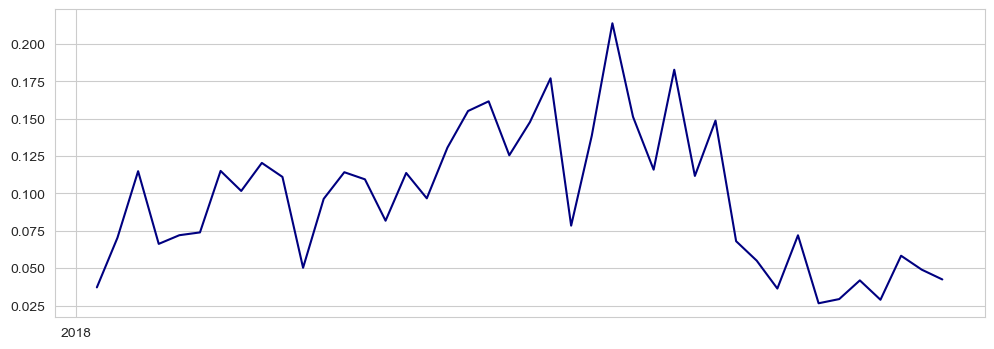

In [15]:
fig5, ax = plt.subplots(figsize=(12, 4))

# Set x-axis to show years only
ax.xaxis.set_major_locator(YearLocator(1))
date_form = DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_form)

# Plot the 'Before' data
ax.plot(df_Be['Date'], df_Be['Std'], linewidth=1.5, c='grey', linestyle='-', label='Before Invasions')
# Plot the 'After' data
ax.plot(df_Af['Date'], df_Af['Std'], linewidth=1.5, c='navy', linestyle='-', label='After Invasions')

# Plot the 'After' trendline
ax.plot(dates.num2date(x_num2), trend_Af, linewidth=1.0, c='red', linestyle='-.', 
        label='Observed Trend (After)')

# Formatting the plot nicely
ax.set_xlim([df_Be['Date'].min(), df_Af['Date'].max()])
plt.setp(ax.get_xticklabels(), rotation=25, ha="right")
# Set y-axis limits for second axis (Std)
ax.set_ylim([0, 1])
ax.grid(True, color='silver', linestyle=':', linewidth=1)

# Add labels to axes
ax.set_xlabel('Time')
ax.set_ylabel('Std Deviation')

# Add a legend
ax.legend()
# Show the plot
plt.show()

In [ ]:
# Ensure 'Date' is in datetime format
df_Be['Date'] = pd.to_datetime(df_Be['Date'])
df_Af['Date'] = pd.to_datetime(df_Af['Date'])

# Extract month from 'Date' column and calculate monthly mean for 'before' period
df_Be['Month'] = df_Be['Date'].dt.month
monthly_Be = df_Be.groupby('Month').mean()

# Extract month from 'Date' column and calculate monthly mean for 'after' period
df_Af['Month'] = df_Af['Date'].dt.month
monthly_Af = df_Af.groupby('Month').mean()

In [ ]:
# Plot the seasonal patterns
fig6, ax = plt.subplots(figsize=(12, 5))

# Plot for 'before' period
ax.plot(monthly_Be.index, monthly_Be['Chl'], color='grey', linewidth=1.1,
       linestyle='-.', label='Before 2011')
# Plot for 'after' period
ax.plot(monthly_Af.index, monthly_Af['Chl'], color='navy', linewidth=1.5,
       linestyle='-', label='*After* 2011')

# Add labels and title
ax.set_xlabel('Month', fontweight='bold', c='k', fontsize=10)
ax.set_ylabel('Mean [Chl-a]', fontweight='bold', c='k', fontsize=10)
ax.set_title('CHL Bloom Patterns Before and After 2011',fontsize=11)

# Set x-ticks to show months (1-12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.setp(ax.get_xticklabels(), rotation=25, ha="right")

# Set y-axis limits
ax.set_ylim([0.1, 0.6])
# Add gridlines
ax.grid(True, color='silver', linestyle=':', linewidth=1)

# Add a legend
ax.legend()
# Show the plot
plt.show()

In [ ]:
# Ensure 'Date' is in datetime format
df_Be['Date'] = pd.to_datetime(df_Be['Date'])
df_Af['Date'] = pd.to_datetime(df_Af['Date'])

# Calculate annual mean for Chl and Std before 2011
annual_Be = df_Be.resample('Y', on='Date').mean()
# Calculate annual mean for Chl and Std after 2011
annual_Af = df_Af.resample('Y', on='Date').mean()

# Display the results
print("Annual mean before 2011:")
print(annual_Be[['Chl', 'Std']])
print("\nAnnual mean after 2011:")
print(annual_Af[['Chl', 'Std']])

In [ ]:
# Plot the annual mean Chl before and after 2011 on the same plot
fig7, ax = plt.subplots(figsize = (13, 5))

# Plot for 'before 2011'
plt.plot(annual_Be.index, annual_Be['Chl'],linewidth= 1.0, c='black', 
         linestyle = '-.', label='Before 2011')
# Plot for 'after 2011'
plt.plot(annual_Af.index, annual_Af['Chl'], linewidth = 1.0, c='navy', 
         linestyle = '--', label='After 2011')

# Plot for 'before 2011'
plt.plot(annual_Be.index, annual_Be['Std'],linewidth= 0.5, c='grey', marker='.',
         linestyle = ':', label='Std Deviation')
# Plot for 'after 2011'
plt.plot(annual_Af.index, annual_Af['Std'], linewidth = 0.5, c='blue', marker='.',
         linestyle = ':', label='Std Deviation')

# Add labels and title
ax.set_xlabel('Month', fontweight='bold', c='k', fontsize=10)
ax.set_ylabel('Mean [Chl-a]', fontweight='bold', c='k', fontsize=10)
ax.set_title('Patterns Before and After 2011',fontsize=11, c='k')

# Formatting the plot nicely
plt.setp(ax.get_xticklabels(), rotation=25, ha="right")
# Set y-axis limits for second axis (Std)
ax.set_ylim([0.05, 0.4])
ax.grid(True, color='silver', linestyle=':', linewidth=1)

# Add a legend
plt.legend()
# Show the plot
plt.show()

In [ ]:
box1 = pd.DataFrame({'Before':annual_Be['Chl'], 'After':annual_Af['Chl']})
box2 = pd.DataFrame({'Before':annual_Be['Std'], 'After':annual_Af['Std']})

# Set the overall style
sns.set_style('whitegrid')
# Create a figure with two subplots (1 row, 2 columns)
fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed
#-----------------------------------------------------------------------------------------------------------
# Plot the 'Chl' boxplot in the first subplot
sns.boxplot(data=box1, width=0.33, palette="mako", flierprops=dict(marker=''), ax=ax1)
sns.stripplot(data=box1, palette="flare", s=4, jitter=True, alpha=0.9, ax=ax1)

# Limits, Gridlines, Title
ax1.set_ylim([0.18, 0.26])  # Set y-limits for 'Chl'
ax1.set_ylabel('[CHL]', fontsize=10)
ax1.grid(True, linestyle=':', linewidth=1, color='gray', axis='y')
ax1.set_title('Chl Concentration')
#-----------------------------------------------------------------------------------------------------------
# Plot the 'Std' boxplot in the second subplot
sns.boxplot(data=box2, width=0.33, palette="mako", flierprops=dict(marker=''), ax=ax2)
sns.stripplot(data=box2, palette="flare", s=4, jitter=True, alpha=0.9, ax=ax2)

# Limits, Gridlines, Title
ax2.set_ylim([0.06, 0.2])  # Adjust y-limits for 'Std' as needed
ax2.set_ylabel('Std Dev', fontsize=10)
ax2.grid(True, linestyle=':', linewidth=1, color='gray', axis='y')
ax2.set_title('Standard Deviation')
#-----------------------------------------------------------------------------------------------------------
# Adjust the layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()